In [2]:
import pandas as pd

# Загрузка даних
data = pd.read_csv('avocado.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
data = data.dropna()

# Вивід даних
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

# Розділення даних
X = np.array(data['Total Volume']).reshape(-1, 1)
y = np.array(data['Total Bags']).reshape(-1, 1)

# Розбиття даних на навчальну та тестову групи, з відношенням 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Створення моделі лінійної регресії
model = LinearRegression()

# Навчання моделі на навчальних даних
model.fit(X_train, y_train)

# Обрахунок коефіцієнта детермінації
y_pred = model.predict(X_test)
model_r2 = r2_score(y_test, y_pred)

# Отримання коефіцієнтів a і b
model_a = model.coef_
model_b = model.intercept_

print("a (коефіцієнт нахилу):", model_a)
print("b (вільний член):", model_b)
print("R^2:", model_r2)

a (коефіцієнт нахилу): [[0.27318831]]
b (вільний член): [6180.30844977]
R^2: 0.919515905064713


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Діапазон alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Створення нової моделі гребневої регресії
model_ridge = Ridge()

# Перехресна перевірка та підбір гіперпараметрів
grid_search = GridSearchCV(model_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Отримання найкращих параметрів та моделі з найкращими параметрами
best_alpha_ridge = grid_search.best_params_['alpha']
best_model_ridge = grid_search.best_estimator_

# Навчання моделі з найкращими параметрами
best_model_ridge.fit(X_train, y_train)

# Обрахунок коефіцієнта детермінації
ridge_y_pred = best_model_ridge.predict(X_test)
ridge_model_r2 = r2_score(y_test, ridge_y_pred)

# Отримання коефіцієнтів a і b
ridge_model_a = best_model_ridge.coef_
ridge_model_b = best_model_ridge.intercept_

print("a (коефіцієнт нахилу):", ridge_model_a)
print("b (вільний член):", ridge_model_b)
print("R^2:", ridge_model_r2)
print("Best ridge parametr:", best_alpha_ridge)
print("Best ridge model:", best_model_ridge)

a (коефіцієнт нахилу): [[0.27318831]]
b (вільний член): [6180.30844977]
R^2: 0.919515905064713
Best ridge parametr: 0.001
Best ridge model: Ridge(alpha=0.001)


In [6]:
# Діапазон alpha
param_grid = {'alpha': [2, 0.1, 3, 1, 10, 100]}

# Створення нової моделі лассо регресії
model_lasso = Lasso()

# Перехресна перевірка та підбір гіперпараметрів
grid_search = GridSearchCV(model_lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Отримання найкращих параметрів та моделі з найкращими параметрами
best_alpha_lasso = grid_search.best_params_['alpha']
best_model_lasso = grid_search.best_estimator_

# Навчання моделі з найкращими параметрами
best_model_lasso.fit(X_train, y_train)

# Обрахунок коефіцієнта детермінації
lasso_y_pred = best_model_lasso.predict(X_test)
lasso_model_r2 = r2_score(y_test, lasso_y_pred)

# Отримання коефіцієнтів a і b
lasso_model_a = best_model_lasso.coef_
lasso_model_b = best_model_lasso.intercept_

print("a (коефіцієнт нахилу):", lasso_model_a)
print("b (вільний член):", lasso_model_b)
print("R^2:", lasso_model_r2)
print("Best lasso parametr:", best_alpha_lasso)
print("Best lasso model:", best_model_lasso)

a (коефіцієнт нахилу): [0.27318831]
b (вільний член): [6180.30844978]
R^2: 0.9195159050647118
Best lasso parametr: 0.1
Best lasso model: Lasso(alpha=0.1)


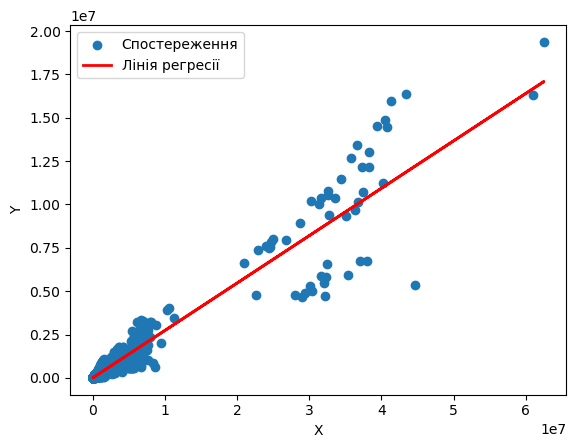

In [7]:
import matplotlib.pyplot as plt

# Візуалізація лінійної регресії
plt.scatter(X_test, y_test, label='Спостереження')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

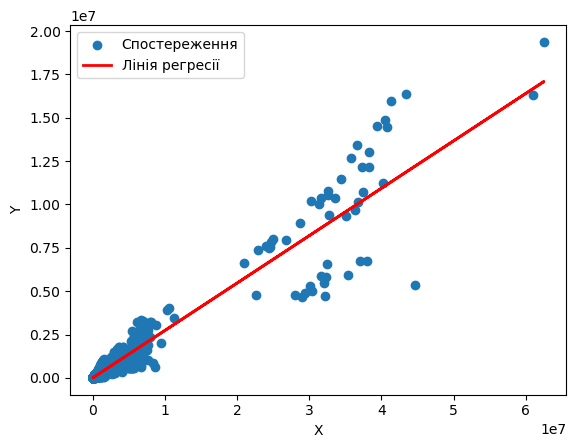

In [8]:
# Візуалізація гребневої лінійної регресії
plt.scatter(X_test, y_test, label='Спостереження')
plt.plot(X_test, ridge_y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

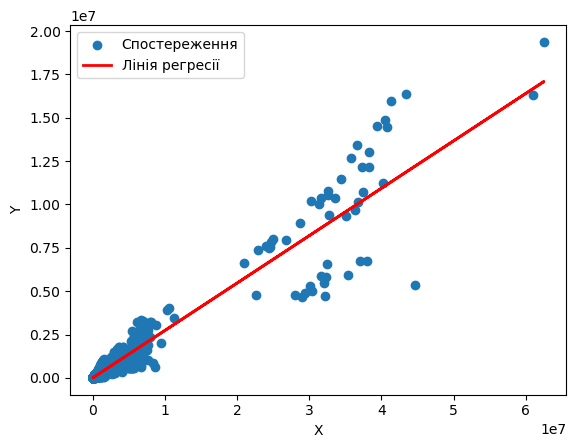

In [9]:
# Візуалізація лінійної регресії
plt.scatter(X_test, y_test, label='Спостереження')
plt.plot(X_test, lasso_y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()